# Reporte abonos cartolas BECH

In [2]:
import os
import datetime
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from openpyxl import Workbook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np

username = os.getlogin()            
hoy = datetime.datetime.now()
date_format = "%d.%m.%Y"
date_formatexport = "%d-%m-%Y"
fecha_actual = hoy.strftime(date_formatexport)
fecha_cartola = hoy.strftime(date_format)

df_mes = pd.DataFrame
df_ajustes = pd.DataFrame
alm = pd.DataFrame

lowmemory = False

file_path = 'C:\\Users\\' + username + '\\Documents\\Py\\IDENTIFICADOR\\AJUSTES\\MONTOSXCIERRES.csv'

print("Cargando archivos...")

df_cierres = pd.read_csv(file_path,
                        sep=';',
                        dtype=np.int64,
                        header=None,
                        names=['monto','agencia'])

folder_path = 'C:\\Users\\' + username + '\\Documents\\Py\\ARCHIVOS PROCESO AM\\CARTOLAS HISTORICAS'

files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
df_list = []
for file in files:
    df = pd.read_csv(os.path.join(folder_path, file),
                        sep=';',
                        header=None,
                        thousands='.',
                        names=['fecha', 'sucursal', 'operacion', 'descripcion', 'cargos', 'abonos','ind'])
    df_list.append(df)
df_mes = pd.concat(df_list)
df_mes['fecha'] = df_mes['fecha'].str.replace('/', '-')
df_mes['fecha'] = pd.to_datetime(df_mes['fecha'],format='mixed',dayfirst=True)
df_mes = df_mes.sort_values(by='fecha')

df_agencias = df_cierres
df_agencias = df_agencias[df_agencias['monto'] != 0]
#df_agencias[['monto','agencia']] = df_agencias[['monto','agencia']].astype(int)
df_agencias['agencia'] = df_agencias['agencia'].astype(int)
df_agencias['monto'] = df_agencias['monto'].astype(int)
df_agencias.sort_values(by='monto', ascending=True, inplace=True)
df_agencias.drop_duplicates(subset='monto',keep='first', inplace=True)


df_ident = pd.merge(df_mes, df_agencias, how='left', left_on='abonos', right_on='monto')
df_ident['agencia'] = df_ident['agencia'].astype(str).replace('\.0$','',regex=True)
df_ident['monto'] = df_ident['monto'].astype(str).replace('\.0$','',regex=True)

print("Archivos cargados")

Cargando archivos...
Archivos cargados


In [3]:
df_ident['fecha'] = df_ident['fecha'].dt.strftime(date_formatexport)
df_ident = df_ident.drop(columns=['ind','monto'])
df_ident.to_excel('C:\\Users\\' + username + '\\Documents\\Py\\JPNB\\GENERADOS\\Reporte mes ' + fecha_actual + '.xlsx',
            header=True,
            index=False)

In [7]:
df_pie = pd.DataFrame(columns=['tabono','count'])

# Pie de abonos

<Axes: title={'center': 'Abonos'}>

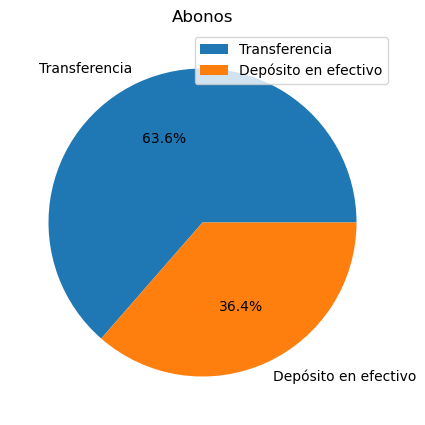

In [113]:
df_pie = pd.DataFrame(columns=['tabono','count'])
count_tf = df_mes[df_mes['descripcion'].str.contains('transferencia', case=False)].shape[0]
count_def = df_mes[df_mes['descripcion'].str.contains('efectivo', case=False)].shape[0]
count_otros = df_mes[~df_mes['descripcion'].str.contains('efectivo|transferencia', case=False,regex=True)].shape[0]
df_pie.loc[len(df_pie)]= ['Transferencia',count_tf]
df_pie.loc[len(df_pie)]= ['Depósito en efectivo',count_def]
#df_pie.loc[len(df_pie)]= ['Otros',count_otros]
df_pie.set_index('tabono',inplace=True)
df_pie.plot.pie(y='count',ylabel = '',title = 'Abonos',autopct= lambda p:'{:.1f}%'.format(p,p * sum(df_pie['count'])/100), figsize=(10,5))


Conteo tipos de abonos

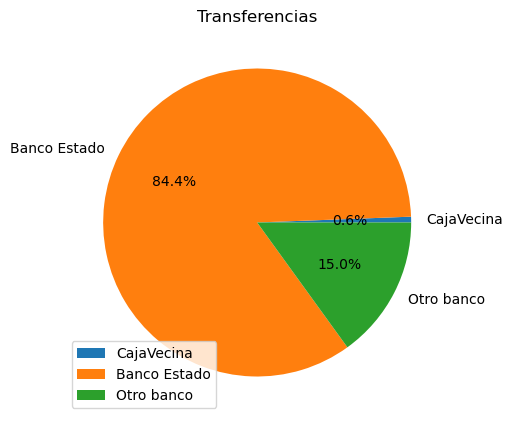

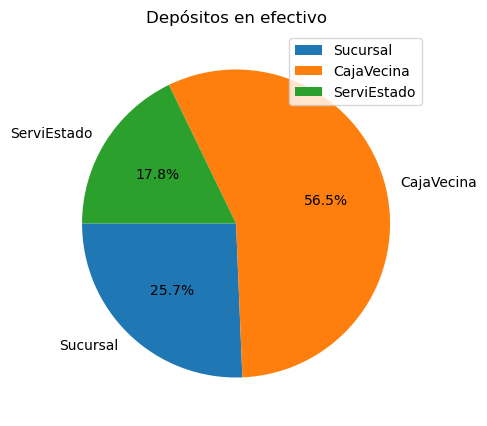

In [131]:
df_muestra = df_mes

df_pietransf = pd.DataFrame(columns=['tabono','count'])

df_tf = df_muestra[df_muestra['descripcion'].str.contains('transferencia', case=False)]
df_tfob = df_tf[df_tf['descripcion'].str.startswith('Transferencia otro banco de rut')]
df_tfbech = df_tf[df_tf['descripcion'].str.startswith('Transferencia bancoestado de')]
df_tfcv = df_tf[df_tf['descripcion'].str.startswith('Transferencia caja vecina')]

count_tfob = df_tfob.shape[0]
count_tfbech = df_tfbech.shape[0]
count_tfcv = df_tfcv.shape[0]

df_pietransf.loc[len(df_pietransf)]= ['CajaVecina',count_tfcv]
df_pietransf.loc[len(df_pietransf)]= ['Banco Estado',count_tfbech]
df_pietransf.loc[len(df_pietransf)]= ['Otro banco',count_tfob]
df_pietransf.set_index('tabono',inplace=True)
df_pietransf.plot.pie(y='count',ylabel='', title='Transferencias',autopct= lambda p:'{:.1f}%'.format(p,p * sum(df_pie['count'])/100), figsize=(10,5))

df_piedef = pd.DataFrame(columns=['tabono','count'])

df_def = df_muestra[df_muestra['descripcion'].str.contains('efectivo', case=False)]
df_defef = df_def[df_def['descripcion'].str.startswith('Depositoenefectivo')]
df_defsv = df_def[df_def['descripcion'].str.startswith('Deposito en efectivo serviestado')]
df_defcv = df_def[df_def['descripcion'].str.startswith('Deposito en efectivo caja vecina')]
df_defcaj = df_def[df_def['descripcion'].str.startswith('Deposito efectivo en cajero automatico')]

count_defef = df_defef.shape[0]
count_defsv = df_defsv.shape[0]
count_defcv = df_defcv.shape[0]
count_defcaj = df_defcaj.shape[0]

df_piedef.loc[len(df_piedef)]= ['Sucursal',count_defef]
df_piedef.loc[len(df_piedef)]= ['CajaVecina',count_defcv]
df_piedef.loc[len(df_piedef)]= ['ServiEstado',count_defsv]
#df_piedef.loc[len(df_piedef)]= ['Otros',count_defcaj]
df_piedef.set_index('tabono',inplace=True)
df_piedef.plot.pie(y='count',ylabel='',title='Depósitos en efectivo',startangle=180,autopct= lambda p:'{:.1f}%'.format(p,p * sum(df_pie['count'])/100), figsize=(10,5))

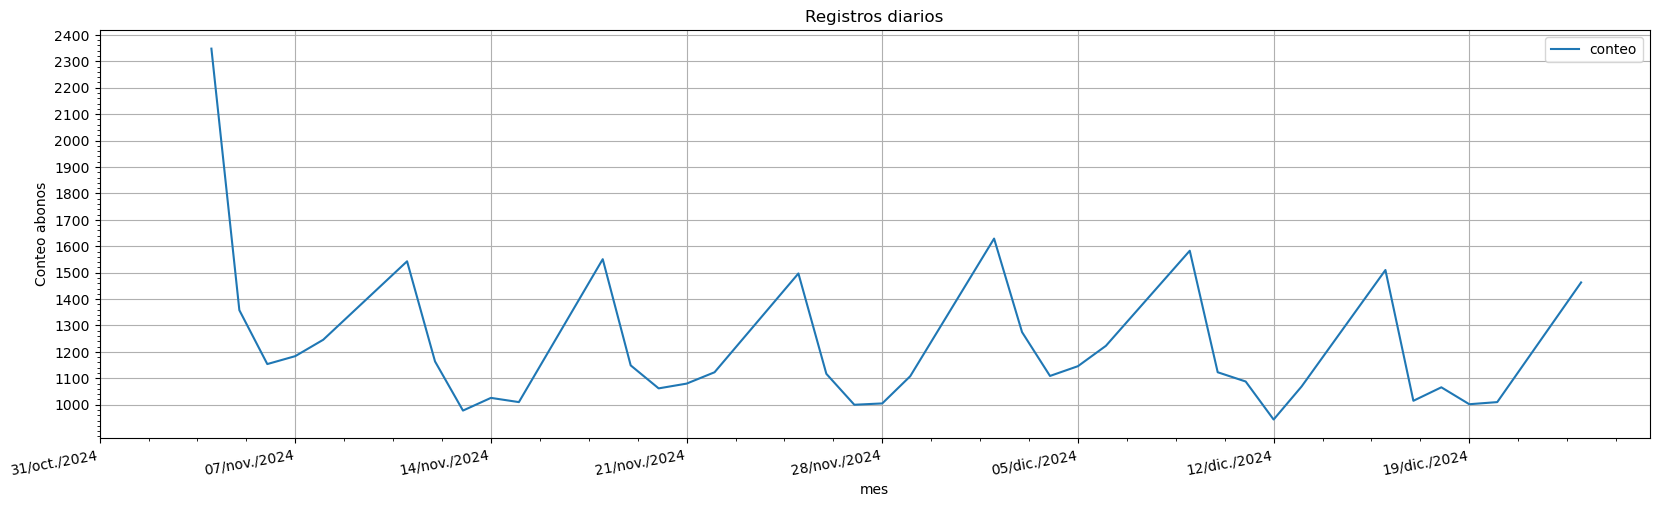

1221.0555555555557


In [159]:
df_conteo = df_mes['fecha'].value_counts().reset_index(name='conteo')
df_conteo = df_conteo[df_conteo['fecha'] < '2024-12-24']
df_conteo = df_conteo[df_conteo['fecha'] > '2024-10-30']
df_conteo.set_index('fecha',inplace=True)
df_conteo.plot(title='Registros diarios',xlabel='mes',ylabel='Conteo abonos',figsize=(20,6))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p:f'{x}'))
myFmt = mdates.DateFormatter('%d/%b/%Y')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.xticks(np.arange('2024-11', '2025-01', dtype='datetime64[W]'),rotation=10, ha='right')
plt.grid(True)
plt.yticks(np.arange(1000,2500,step=100))
plt.gca().minorticks_on()
plt.show()
print(df_conteo['conteo'].mean())

# Obtener cierres según monto

In [ ]:

df_muestra = df_ajustes.copy()
num = 317100
print("Monto cierre: "+ str(num))
df_muestra = df_ajustes[df_ajustes['mcca'] == num].tail()
if df_muestra.empty:
    print("No se encuentran cierres por el monto consultado")
else:
    df_muestra.drop_duplicates(subset='cierre',keep='first', inplace=True)
    print(df_muestra)

# Obtener abonos según monto

In [ ]:

df_muestra = df_ident.copy()
num = 119600
print("Monto abono: "+ str(num))
df_muestra = df_muestra[df_muestra['abonos'] == num].tail()
if df_muestra.empty:
    print("No se encuentran cierres por el monto consultado")
else:
    print(df_muestra)

# Ubicar abono según N° Operacion

In [ ]:
df_muestra = df_mes[df_mes['operacion'].astype(str).str.contains('1562', case=False)].shape[0]
# sorted_df = count_df.sort_values(by='descripcion', ascending=False)
print (df_muestra)

# Montos de cierres por agencia

In [ ]:
num = 16047150
# df_muestra = df_agencias[df_agencias['mcca'].astype(str).str.contains(str(num), case=False)]
# sorted_df = count_df.sort_values(by='descripcion', ascending=False)
# print (df_muestra)

df_muestra = df_agencias.copy()
num = 18122320
print("Agencia: "+ str(num))
df_muestra = df_agencias[df_agencias["agencia"] == num]
if df_muestra.empty:
    print("No se encuentran registros de la agencia")
else:
    df_muestra.drop_duplicates(subset='mcca',keep='first')
    print(df_muestra)

# Cierres por agencia

In [ ]:

df_muestra = df_agencias.copy()
num = 24178000
print("Agencia: "+ str(num))
df_muestra = df_agencias[df_agencias['agencia'] == num].tail()
if df_muestra.empty:
    print("No se encuentran cierres para la agencia")
else:
    df_muestra.drop_duplicates(subset='monto',keep='last',inplace=True)
    print(df_muestra)

# Cuadratura de abonos

In [ ]:
muestraex = df_mes[df_mes['abonos'].astype(int) == 49180]
muestrarut = df_mes[df_mes['descripcion'].str.contains('') | df_mes['descripcion'].str.contains('15184281-5')]
muestra = pd.concat([muestraex,muestrarut])
print(muestra)


In [ ]:
df_abonos = df_abonos.drop(columns=['mcca'])
df_abonos.to_excel('C:\\Users\\' + username + '\\Documents\\Py\\JPNB\\GENERADOS\\Cuadratura AG. ' + str(num) + '.xlsx',
            header=True,
            index=False)

In [ ]:
df_mes.to_csv('C:\\Users\\' + username + '\\Documents\\Py\\JPNB\\GENERADOS\\Reporte mes ' + fecha_actual + '.csv',
            sep=';',
            header=False,
            index=False,
            date_format = date_formatexport)

In [ ]:
ndigitos = 6
num = 111660
print("Monto consultado: "+ str(num))
df_ag = df_agencias[df_agencias['mcca'].apply(lambda x:
         str(x).zfill(len(str(num)))[-ndigitos:] ==
         str(num).zfill(len(str(num)))[-ndigitos:])]['agencia']# .tail()
if df_ag.empty:
   print("N/A - No se encuentra agencia alguna vinculada al monto.")
else:
   print(df_ag)

Exportar

In [ ]:
tipos_fecha = df_mes['fecha'].unique()
tipos_sucursal = df_mes['sucursal'].unique()
tipos_operacion = df_mes['operacion'].unique()
tipos_descripcion = df_mes['descripcion'].unique()
tipos_agencia = df_mes['agencia'].unique()